# Product Market Forecasting using Bass Model

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.integrate import odeint
from scipy.misc import derivative
import statsmodels.formula.api as smf
from datetime import datetime

In [165]:
# определяем DataFrame Мировой
data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
                     'generate': [8.26192344363636, 9.20460066059596, 12.0178164697778, 15.921260267805, 21.2161740066094, 31.420434564131, 38.3904519471421, 52.3307819867071, 62.9113953016839, 85.1161924282732, 104.083879757882, 132.859216030029, 170.682620580279, 220.600045153997, 276.020526299077, 346.465021938078, 440.385091980306, 530.55442135112, 635.49205101167, 705.805860788812, 831.42968828187, 962.227395409379, 1140.31094904253, 1269.52053571083, 1418.17004626655, 1591.2135122193]})

# определяем DataFrame Европа
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [3.86302920121212, 4.82858524525252, 7.29549295555556, 11.1764791351515, 14.2443217667677, 22.4547142028283, 26.9342866553535, 36.4259493147475, 44.5311522856566, 59.296786859596, 71.0967493651913, 83.1641398783648, 105.713193767021, 121.353901497536, 135.383228613187, 153.443496864175, 186.657403230905, 215.032405064032, 248.115255753321, 264.815019959907, 318.931230019458, 322.867876348302, 384.216521406329, 403.217594774174, 460.029812809329, 510.138071007773]})

# определяем DataFrame Северная америка
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [3.26221515151515, 3.33473636363636, 3.39524747474747, 3.13325858585859, 4.71233131313131, 5.93275858585859, 7.15238484848485, 10.8848686868687, 12.0094707070707, 15.2516070707071, 19.5614535353535, 29.3507141414141, 38.0231120606061, 59.9658373737374, 81.8704608585859, 105.571632323232, 133.227399166667, 157.24394260101, 184.865083282828, 202.73345020202, 228.356483611111, 270.596628055556, 299.004805909091, 321.654747474747, 348.257532336614, 396.728298131659]})

# определяем DataFrame Центральная и Южная америка
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [0.00777777777777778, 0.0419739852222222, 0.102925997979798, 0.111372380198889, 0.148471920316465, 0.252114795739394, 0.320991025326263, 0.458866738412121, 0.44309745380303, 0.543414491936364, 0.532301140512121, 0.773789270347576, 1.16145997464749, 1.6704335559914, 2.07792761282224, 3.44912776667099, 4.32435901479341, 7.80414735195275, 10.1969105470833, 18.5816815022246, 31.4603868218231, 45.1770034913969, 56.1317767046775, 65.7589869448652, 78.7649400881846, 85.4184260493074]})

# определяем DataFrame CIS
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0019, 0.0031, 0.0062, 0.0086, 0.00801010101010101, 0.0078, 0.0088, 0.0105, 0.0081, 0.0112, 0.009786, 0.012539, 0.018116, 0.0211217, 0.1256712, 0.3290593, 0.5239033, 0.6069637, 0.8290751, 1.3396434, 2.59858862101087]})

# определяем DataFrame Африка
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [0.0063, 0.0071, 0.0072, 0.0076, 0.0198, 0.1755, 0.41558, 0.443584, 0.535599, 0.768280505050505, 0.780382111111111, 0.852565606060606, 1.01622336363934, 1.31177813131313, 1.58923093939543, 2.28458243433914, 2.38650393937963, 2.51563024049708, 3.59344730255575, 5.06007283421232, 8.91068628262324, 11.1763706727939, 12.4577740957429, 14.770723351763, 18.8577291329819, 21.7898430685021]})

# определяем DataFrame Asia Pacific
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [1.12160131313131, 0.991205066484849, 1.21395004149495, 1.48955016659596, 2.05324900639394, 2.56394697970469, 3.51740941797741, 4.06701324667883, 5.34087585515362, 9.18669339997316, 12.019193605714, 18.5698071338417, 24.6031314143647, 36.0798945954192, 54.8479782750866, 81.4841965496602, 113.551087628561, 147.723580093628, 188.472143425882, 214.272687090449, 243.060053246854, 311.20761354133, 387.097778226688, 461.951758065283, 509.368307094495, 572.636106061397]})

# определяем DataFrame Middle East
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [0.001, 0.001, 0.003, 0.003, 0.038, 0.0395, 0.0467, 0.0443, 0.0426, 0.0614, 0.086, 0.1394, 0.155, 0.2101, 0.2405, 0.2222, 0.2258, 0.2166, 0.228089, 0.217278, 0.381789, 0.678, 0.795329, 1.33765, 1.55208140494423, 1.90417927964862]})

In [166]:
def densityFunction(p, q, t):
    return (np.exp((p+q)*t)*p*(p+q)**2)/((p*np.exp((p+q)*t)+q)**2)

### Successful product case

In [167]:
t = np.linspace(1, 20, 20) #time
m = 100000 #market size
p = 0.01 #coefficient of innovation
q = 0.2 #coefficient of imitation

In [168]:
f = densityFunction(p,q,t)

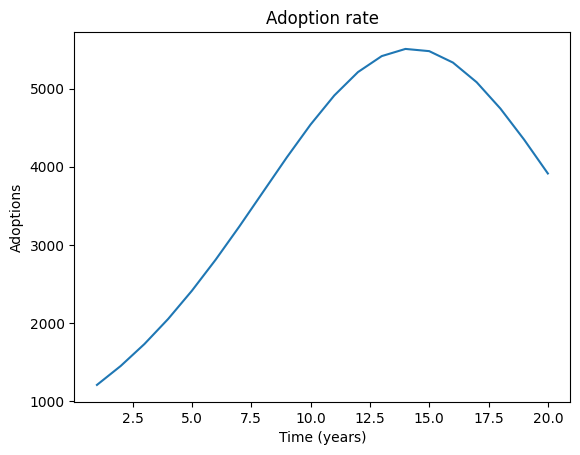

In [169]:
fig = plt.figure()
plt.plot(t, m*f)
plt.ylabel('Adoptions')
plt.xlabel('Time (years)')
plt.title("Adoption rate")
#plt.legend()
plt.show()

In [170]:
peak_time = -1/(p+q)*np.log(p/q)
print(peak_time)

14.26539177882853


### Unsuccessful product case

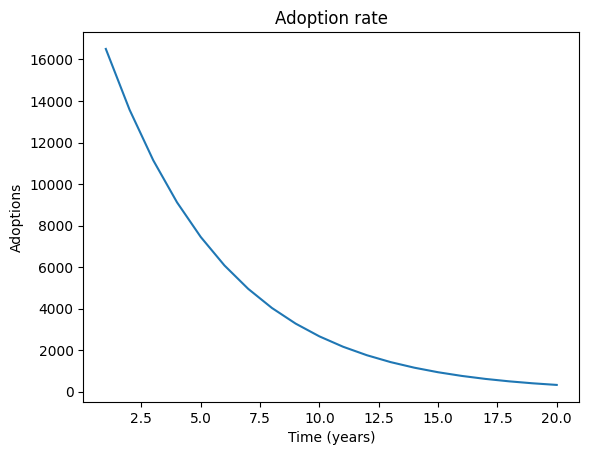

In [171]:
p=0.2
q=0.01
f = densityFunction(p,q,t)
fig = plt.figure()
plt.plot(t, m*f)
plt.ylabel('Adoptions')
plt.xlabel('Time (years)')
plt.title("Adoption rate")
#plt.legend()
plt.show()

In [172]:
peak_time = -1/(p+q)*np.log(p/q)
print(peak_time)

-14.265391778828528


In [173]:
# Bass model
def FF(p, q, t):
    return p*(np.exp((p+q)*t)-1)/(p*np.exp((p+q)*t)+q)

# iPhone Sales Forecast

In [174]:
# data = pd.read_csv('iphone_sales.txt', delim_whitespace=True)
# определяем DataFrame Мировой
data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
                     'generate': [8.26192344363636, 9.20460066059596, 12.0178164697778, 15.921260267805, 21.2161740066094, 31.420434564131, 38.3904519471421, 52.3307819867071, 62.9113953016839, 85.1161924282732, 104.083879757882, 132.859216030029, 170.682620580279, 220.600045153997, 276.020526299077, 346.465021938078, 440.385091980306, 530.55442135112, 635.49205101167, 705.805860788812, 831.42968828187, 962.227395409379, 1140.31094904253, 1269.52053571083, 1418.17004626655, 1591.2135122193]})

# определяем DataFrame Европа
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [3.86302920121212, 4.82858524525252, 7.29549295555556, 11.1764791351515, 14.2443217667677, 22.4547142028283, 26.9342866553535, 36.4259493147475, 44.5311522856566, 59.296786859596, 71.0967493651913, 83.1641398783648, 105.713193767021, 121.353901497536, 135.383228613187, 153.443496864175, 186.657403230905, 215.032405064032, 248.115255753321, 264.815019959907, 318.931230019458, 322.867876348302, 384.216521406329, 403.217594774174, 460.029812809329, 510.138071007773]})

# определяем DataFrame Северная америка
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [3.26221515151515, 3.33473636363636, 3.39524747474747, 3.13325858585859, 4.71233131313131, 5.93275858585859, 7.15238484848485, 10.8848686868687, 12.0094707070707, 15.2516070707071, 19.5614535353535, 29.3507141414141, 38.0231120606061, 59.9658373737374, 81.8704608585859, 105.571632323232, 133.227399166667, 157.24394260101, 184.865083282828, 202.73345020202, 228.356483611111, 270.596628055556, 299.004805909091, 321.654747474747, 348.257532336614, 396.728298131659]})

# определяем DataFrame Центральная и Южная америка
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [0.00777777777777778, 0.0419739852222222, 0.102925997979798, 0.111372380198889, 0.148471920316465, 0.252114795739394, 0.320991025326263, 0.458866738412121, 0.44309745380303, 0.543414491936364, 0.532301140512121, 0.773789270347576, 1.16145997464749, 1.6704335559914, 2.07792761282224, 3.44912776667099, 4.32435901479341, 7.80414735195275, 10.1969105470833, 18.5816815022246, 31.4603868218231, 45.1770034913969, 56.1317767046775, 65.7589869448652, 78.7649400881846, 85.4184260493074]})

# определяем DataFrame CIS
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0019, 0.0031, 0.0062, 0.0086, 0.00801010101010101, 0.0078, 0.0088, 0.0105, 0.0081, 0.0112, 0.009786, 0.012539, 0.018116, 0.0211217, 0.1256712, 0.3290593, 0.5239033, 0.6069637, 0.8290751, 1.3396434, 2.59858862101087]})

# определяем DataFrame Африка
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [0.0063, 0.0071, 0.0072, 0.0076, 0.0198, 0.1755, 0.41558, 0.443584, 0.535599, 0.768280505050505, 0.780382111111111, 0.852565606060606, 1.01622336363934, 1.31177813131313, 1.58923093939543, 2.28458243433914, 2.38650393937963, 2.51563024049708, 3.59344730255575, 5.06007283421232, 8.91068628262324, 11.1763706727939, 12.4577740957429, 14.770723351763, 18.8577291329819, 21.7898430685021]})

# определяем DataFrame Asia Pacific
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [1.12160131313131, 0.991205066484849, 1.21395004149495, 1.48955016659596, 2.05324900639394, 2.56394697970469, 3.51740941797741, 4.06701324667883, 5.34087585515362, 9.18669339997316, 12.019193605714, 18.5698071338417, 24.6031314143647, 36.0798945954192, 54.8479782750866, 81.4841965496602, 113.551087628561, 147.723580093628, 188.472143425882, 214.272687090449, 243.060053246854, 311.20761354133, 387.097778226688, 461.951758065283, 509.368307094495, 572.636106061397]})

# определяем DataFrame Middle East
# data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
#                      'generate': [0.001, 0.001, 0.003, 0.003, 0.038, 0.0395, 0.0467, 0.0443, 0.0426, 0.0614, 0.086, 0.1394, 0.155, 0.2101, 0.2405, 0.2222, 0.2258, 0.2166, 0.228089, 0.217278, 0.381789, 0.678, 0.795329, 1.33765, 1.55208140494423, 1.90417927964862]})


In [175]:
data.head()

,year,generate
0,1995,8.261923
1,1996,9.204601
2,1997,12.017816
3,1998,15.921260
4,1999,21.216174


In [176]:
quarter = data['year']
quarter

0     1995
1     1996
2     1997
3     1998
4     1999
5     2000
6     2001
7     2002
8     2003
9     2004
10    2005
11    2006
12    2007
13    2008
14    2009
15    2010
16    2011
17    2012
18    2013
19    2014
20    2015
21    2016
22    2017
23    2018
24    2019
25    2020
Name: year, dtype: int64

In [177]:
# qs = quarter.str.replace(r'(Q\d)_(\d+)', r'20\2-\1')

In [178]:
# data['date'] = pd.PeriodIndex(qs.values, freq='Q').to_timestamp()
# pd.to_timestamp(str(n)+'-01-01')
data['date'] = [pd.to_datetime(str(n)+'-01-01') for n in quarter]


In [179]:
date = data['date']
date

0    1995-01-01
1    1996-01-01
2    1997-01-01
3    1998-01-01
4    1999-01-01
5    2000-01-01
6    2001-01-01
7    2002-01-01
8    2003-01-01
9    2004-01-01
10   2005-01-01
11   2006-01-01
12   2007-01-01
13   2008-01-01
14   2009-01-01
15   2010-01-01
16   2011-01-01
17   2012-01-01
18   2013-01-01
19   2014-01-01
20   2015-01-01
21   2016-01-01
22   2017-01-01
23   2018-01-01
24   2019-01-01
25   2020-01-01
Name: date, dtype: datetime64[ns]

In [180]:
sales = data['generate']
sales

0        8.261923
1        9.204601
2       12.017816
3       15.921260
4       21.216174
5       31.420435
6       38.390452
7       52.330782
8       62.911395
9       85.116192
10     104.083880
11     132.859216
12     170.682621
13     220.600045
14     276.020526
15     346.465022
16     440.385092
17     530.554421
18     635.492051
19     705.805861
20     831.429688
21     962.227395
22    1140.310949
23    1269.520536
24    1418.170046
25    1591.213512
Name: generate, dtype: float64

In [181]:
cum_sales = np.cumsum(sales)

In [182]:
cum_sales_squared = cum_sales**2

In [183]:
mod = smf.ols(formula='sales ~ cum_sales + cum_sales_squared', data=data)

In [184]:
res = mod.fit()

In [185]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.005e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.46e-34
Time:                        00:06:34   Log-Likelihood:                -109.41
No. Observations:                  26   AIC:                             224.8
Df Residuals:                      23   BIC:                             228.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.1074      4.94

In [186]:
b = res.params

In [187]:
b

Intercept            17.107434
cum_sales             0.203829
cum_sales_squared    -0.000006
dtype: float64

In [188]:
m1 = (-b['cum_sales']+np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])
m1

-83.73060259222368

In [189]:
m2 = (-b['cum_sales']-np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])
m2

35186.84526867423

In [190]:
m = max(m1, m2)

In [191]:
print(m)

35186.84526867423


In [192]:
p = b['Intercept']/m

In [193]:
q = -m*b['cum_sales_squared']

In [194]:
print("p = ",p)
print("q = ", q)
# p = 0.00057
# q = 0.2495
# m = 2407.359

p =  0.00048618833347677704
q =  0.20431518622643477


In [195]:
date_forecast = pd.date_range(start='1995', end='2050', freq='YS')
date_forecast

DatetimeIndex(['1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01',
               '2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01',
               '2027-01-01', '2028-01-01', '2029-01-01', '2030-01-01',
               '2031-01-01', '2032-01-01', '2033-01-01', '2034-01-01',
               '2035-01-01', '2036-01-01', '2037-01-01', '2038-01-01',
               '2039-01-01', '2040-01-01', '2041-01-01', '2042-01-01',
               '2043-01-01', '2044-01-01', '2045-01-01', '2046-01-01',
               '2047-01-01', '2048-01-01', '2049-01-01', '2050-01-01'],
     

In [196]:
t = range(len(date_forecast))

In [197]:
# f = densityFunction(p,q,t)
f = FF(p,q,t)
sales_forecast = m*f

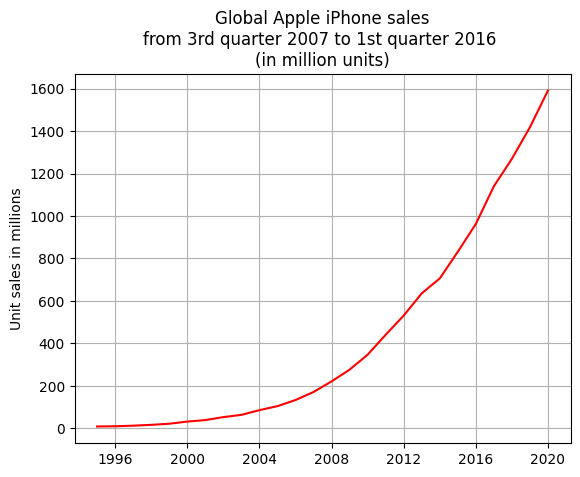

In [198]:
fig, ax = plt.subplots()
ax.plot(date, sales, color='red')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Apple iPhone sales\nfrom 3rd quarter 2007 to 1st quarter 2016 \n(in million units)")
#plt.legend()
ax.grid(True)
plt.show()

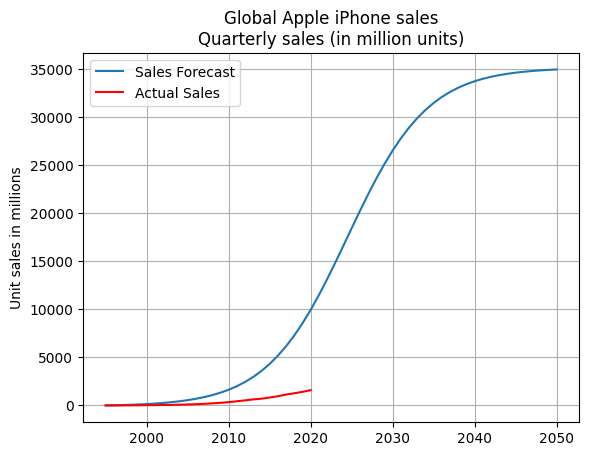

In [199]:
fig, ax = plt.subplots()
ax.plot(date_forecast, sales_forecast, label='Sales Forecast')
ax.plot(date, sales, color='red', label='Actual Sales')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Apple iPhone sales\nQuarterly sales (in million units)")
plt.legend()
ax.grid(True)
plt.show()

In [200]:
sales_apple = sales
date_apple = date
date_forecast_apple = date_forecast
sales_forecast_apple = sales_forecast

## Sales Peak

In [201]:
peak_time = -1/(p+q)*np.log(p/q)

In [202]:
print(peak_time)

29.496008304242714


In [203]:
print(data['generate'].idxmax() + 1)

26
